**WEEK TWO EXERCISES**

This nootebook is created to provide solution on the exercises given in the Pytorch workflow, which basically include the following:




1.   data (prepare and load)
2.   build model
3.   fitting the model to data (training)
4.   making predictions and evaluating a model (inference)
5.   saving and loading a model
6.   putting it all together


##***`The questions are as follows`***


All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

> **Note:** For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.
3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

















In [11]:
#let start by importing the pytourch lavbries and also the check the pytouch version
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.1.0+cu121'

**`QUESTION ONE`**

In [12]:
#Create a straight line dataset using the linear regression formula (weight * X + bias).
#Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
#Split the data into 80% training, 20% testing.
#Plot the training and testing data so it becomes visual.

weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [13]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [14]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in black
  plt.scatter(train_data, train_labels, c="black", s=4, label="Training data")

  # Plot test data in orange
  plt.scatter(test_data, test_labels, c="orange", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="red", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

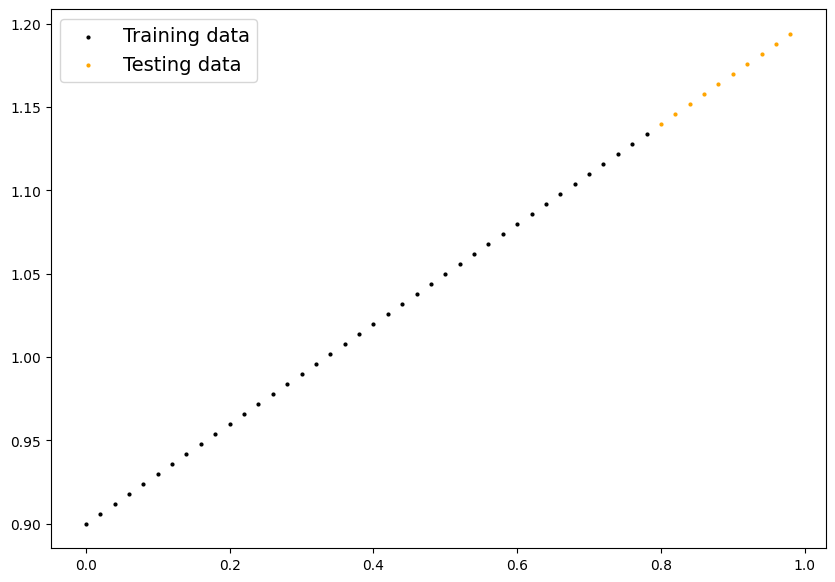

In [15]:
plot_predictions()

**`QUESTION TWO`**

In [30]:
#Build a PyTorch model by subclassing nn.Module.
#Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
#Implement the forward() method to compute the linear regression function you used to create the dataset in 1.
#Once you've constructed the model, make an instance of it and check its state_dict().
#Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.


#nn.module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [26]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [27]:
#NAMED PARAMETERS
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [28]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [29]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


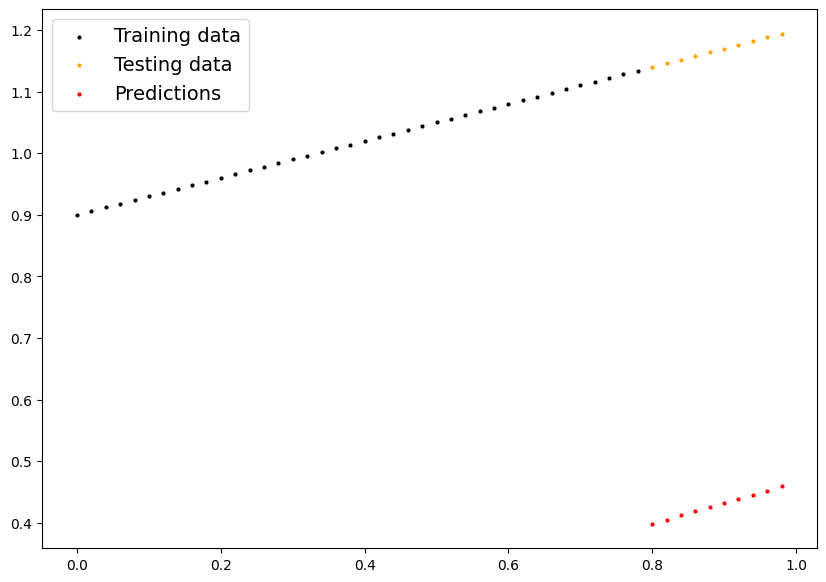

In [31]:
plot_predictions(predictions=y_preds)

**`QUESTION THREE`**

In [32]:
y_test - y_preds

tensor([[0.7418],
        [0.7411],
        [0.7404],
        [0.7396],
        [0.7389],
        [0.7382],
        [0.7374],
        [0.7367],
        [0.7360],
        [0.7352]])

In [33]:
#Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
#Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
#Write a training loop to perform the appropriate training steps for 300 epochs.
#The training loop should test the model on the test dataset every 20 epochs.

# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [34]:
torch.manual_seed(42)

epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    #Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    #Zero grad of the optimizer
    optimizer.zero_grad()

    #Loss backwards
    loss.backward()

    #Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      #Forward pass on test data
      test_pred = model_0(X_test)

      #Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float))

      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.7568813562393188 | MAE Test Loss: 0.7250651121139526 
Epoch: 20 | MAE Train Loss: 0.5264613628387451 | MAE Test Loss: 0.4556453227996826 
Epoch: 40 | MAE Train Loss: 0.2960416078567505 | MAE Test Loss: 0.18622562289237976 
Epoch: 60 | MAE Train Loss: 0.07731032371520996 | MAE Test Loss: 0.06994309276342392 
Epoch: 80 | MAE Train Loss: 0.0521300844848156 | MAE Test Loss: 0.11544597148895264 
Epoch: 100 | MAE Train Loss: 0.04509609192609787 | MAE Test Loss: 0.1043960452079773 
Epoch: 120 | MAE Train Loss: 0.038231261074543 | MAE Test Loss: 0.08853815495967865 
Epoch: 140 | MAE Train Loss: 0.03136344999074936 | MAE Test Loss: 0.07268030941486359 
Epoch: 160 | MAE Train Loss: 0.02448992058634758 | MAE Test Loss: 0.05682243034243584 
Epoch: 180 | MAE Train Loss: 0.01762397214770317 | MAE Test Loss: 0.04027769714593887 
Epoch: 200 | MAE Train Loss: 0.010759142227470875 | MAE Test Loss: 0.024419832974672318 
Epoch: 220 | MAE Train Loss: 0.003885951591655612 | MAE 

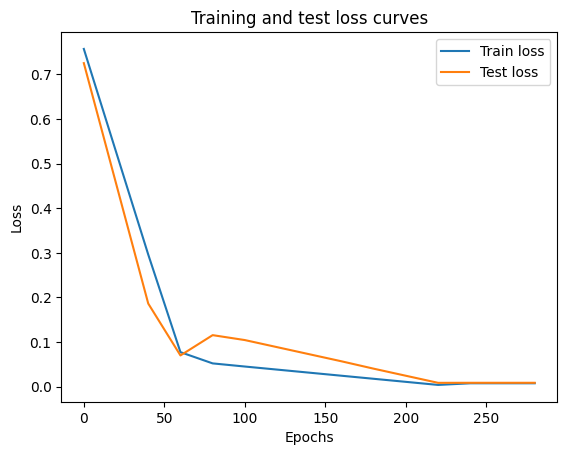

In [35]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [36]:
# Find our model's learned parameters
# and inspect our model
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3055])), ('bias', tensor([0.8903]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


**`QUESTION FOUR`**

In [37]:
#Make predictions with the trained model on the test data.
#Visualize these predictions against the original training and testing data
#(note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

#Set the model in evaluation mode
model_0.eval()

#Setup the inference mode context manager
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.1347],
        [1.1408],
        [1.1469],
        [1.1530],
        [1.1591],
        [1.1652],
        [1.1714],
        [1.1775],
        [1.1836],
        [1.1897]])

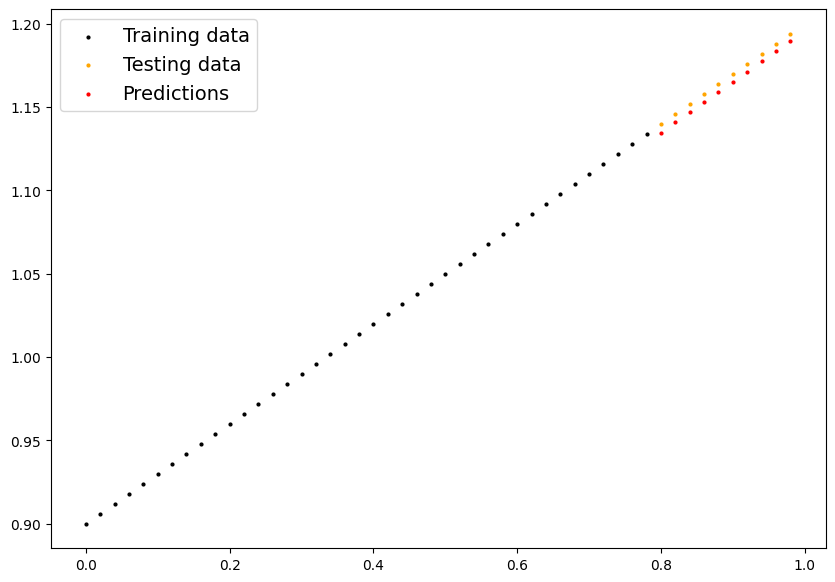

In [38]:
plot_predictions(predictions=y_preds)

In [39]:
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create model save path
MODEL_NAME = "fatima_muhammad_adam_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/fatima_muhammad_adam_model_0.pth


In [40]:
# Check the saved file path
!ls -l models/fatima_muhammad_adam_model_0.pth

-rw-r--r-- 1 root root 1686 Dec 30 19:37 models/fatima_muhammad_adam_model_0.pth


**`QUESTION FIVE`**

In [41]:
#Save your trained model's state_dict() to file.
#Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
#Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

# Instantiate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [42]:
# Put the loaded model into evaluation mode
loaded_model_0.eval()

# Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [43]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])